# CNN: Aplicando Técnicas de Green Deep Learning

Nesse trabalho escolhemos o dataset do CIFAKE, que contém um total de 20000 imagens, sendo 10000 que realmente fotram fotografadas e 10000 que foram geradas por um computador. O intuito é adaptar uma CNN já existente aplicando Fine Tunning em um modelo já existente, nesse caso o ResNet50, para classificar se essas imagens são genuínas (REAL) ou falsas (FAKE).

### Download dp Dataset

Essa etapa só é necessária caso o dataset ainda não esteja na máquina que está rodando. Depois de rodar esse bloco precisa copiar o caminho do diretório de onde está salvo o dataset e adicioná-lo nas variáveis globais (models/globals) em DATASET_PATH.

In [34]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("birdy654/cifake-real-and-ai-generated-synthetic-images")

# print("Path to dataset files:", path)

### Visualizando e adaptando os dados

Afim de explorar o dataset exibimos 9 imagens do CIFAKE e treino e 9 de teste já transformadas para o padrão do ImageNet. Isso é feito porque ResNet50 foi treinado com esse padrão de imagem e para que ele performe bem no nosso dataset é necessário que a entrada possua as mesmas características gerais.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.0822659].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0357141..2.2489083].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.4285715].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0357141..2.4482791].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9637812..2.5702832].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.84523803..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8044444..2.2

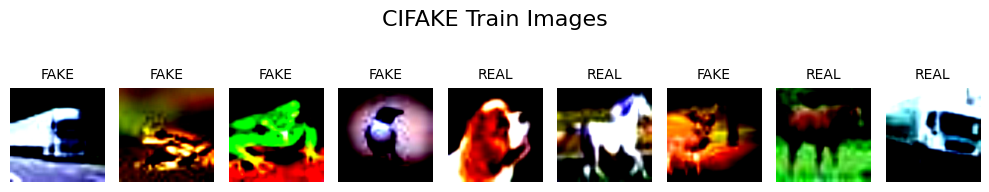

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0357141..2.3088455].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5005665].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0357141..2.2489083].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5702832].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.2885156].

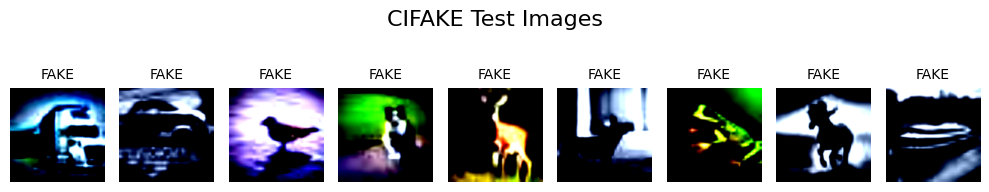

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import os

from modules import utils
from modules import globals

transform = transforms.Compose([
                                     transforms.Resize(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                          std=[0.229, 0.224, 0.225])
                  ])


# Load the training dataset
train_dataset = torchvision.datasets.ImageFolder(
    root=os.path.join(globals.DATASET_PATH, 'train'),
    transform=transform
)
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=globals.BATCH_SIZE,
    shuffle=True,
    num_workers=0
)

# Load the test dataset
test_dataset = torchvision.datasets.ImageFolder(
    root=os.path.join(globals.DATASET_PATH, 'test'),
    transform=transform
)
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=globals.BATCH_SIZE,
    shuffle=False,
    num_workers=0
)

utils.plot_sample(train_loader, "Train")
utils.plot_sample(test_loader, "Test")